<a href="https://colab.research.google.com/github/GUSTAVODHS/data-science-pos-mackenzie/blob/main/PL_Python_4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [73]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [4]:
#Utilizando o código abaixo, é possível perceber que o atributo com a maior ausência de dados é o Alcohol e logo depois temos Population.

percentual_nan = WHO.isnull().sum() / len(WHO)
percentual_nan.sort_values(ascending=False)

Total expenditure                  0.989071
Alcohol                            0.967213
Population                         0.224044
GDP                                0.158470
Schooling                          0.054645
Income composition of resources    0.054645
Hepatitis B                        0.049180
 thinness 5-9 years                0.010929
 thinness  1-19 years              0.010929
BMI                                0.010929
 HIV/AIDS                          0.000000
Diphtheria                         0.000000
Country                            0.000000
Polio                              0.000000
Year                               0.000000
Measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
Adult Mortality                    0.000000
Life_expectancy                    0.000000
Status                             0.000000
under-five deaths                  0.000000
dtype: float64

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

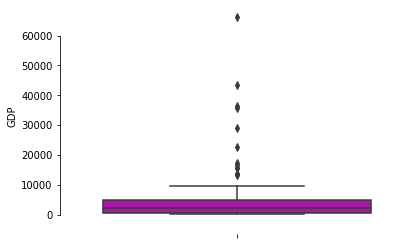

In [12]:
sns.boxplot(y="GDP",
            hue="GDP", palette=["m", "g"],
            data=WHO[WHO.Status == 'Developing'])
sns.despine(offset=10, trim=True)

Analisando os países em desenvolvimento, podemos notar que existem mais outliers se compararmos com o boxplot de países desenvolvidos

Precisamos retirar esses outliers que apresentam dados discrepantes do demais

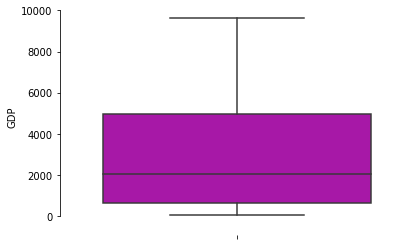

In [20]:
sns.boxplot(y="GDP",
            hue="GDP", palette=["m", "g"],
            data=WHO[(WHO.Status == 'Developing')], showfliers = False)
sns.despine(offset=10, trim=True)

In [26]:
WHO[WHO.GDP > 55000]

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
2071,Qatar,2015,Developing,78.2,68.0,0,NaN,0.0,99.0,18,...,99.0,NaN,99.0,0.1,66346.52267,NaN,5.2,4.9,0.855,13.4


# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

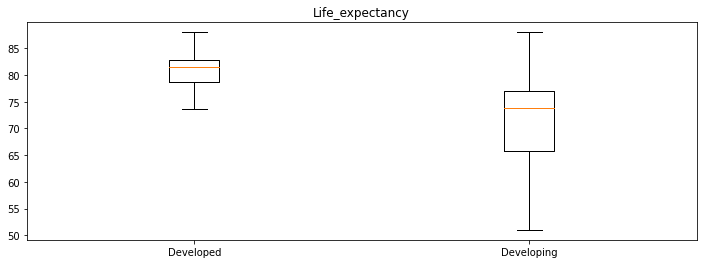

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(WHO[WHO.Status == 'Developed'].Life_expectancy,positions=[1])
plt.boxplot(WHO.Life_expectancy,positions=[2])
plt.title('Life_expectancy')
plt.xticks(ticks=[1,2], labels=['Developed','Developing'])
plt.show()

Ao analisar a Expectativa de Vida dos países em desenvolvimento, é possível perceber que temos a mediana em 74 anos, tendo seu limite inferior em cerca de 50 anos. Nesse caso, a variação da amostra é bem maior em relaçao aos países desenvolvidos.

Já os países desenvolvidos, estão dentro do limite inferior sendo 75 e superior em 85, e a mediana em 81 anos. Era de se esperar que os países desenvolvidos teriam números consideravelmente melhores, pois os recursos e o modo de vida existente contribui para que tenham uma boa vida.

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

No handles with labels found to put in legend.
No handles with labels found to put in legend.


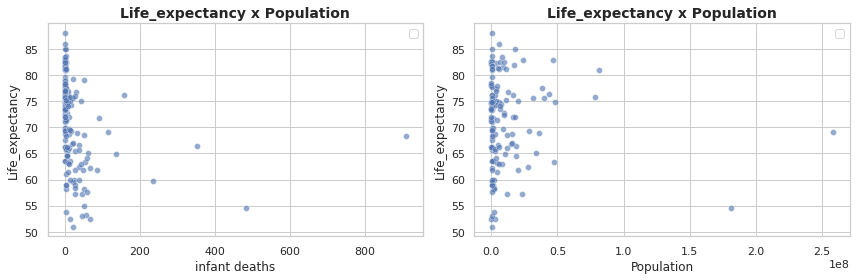

In [75]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=WHO.Life_expectancy, y=WHO['infant deaths'], alpha=0.6)
plt.title('Life_expectancy x Population',fontsize=14,weight='bold')
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x=WHO.Life_expectancy, y=WHO.Population, alpha=0.6)
plt.title('Life_expectancy x Population',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()


# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [43]:
WHO['ranking'] = WHO['Schooling'].rank(ascending=False)

In [44]:
WHO[["Country", "ranking","Schooling"]].sort_values("ranking")

,Country,ranking,Schooling
112,Australia,1.0,20.4
737,Denmark,2.5,19.2
1845,New Zealand,2.5,19.2
1170,Iceland,4.0,19.0
1250,Ireland,5.0,18.6
...,...,...,...
2103,Republic of Moldova,NaN,NaN
2377,Somalia,NaN,NaN
2762,United Kingdom of Great Britain and Northern I...,NaN,NaN
2778,United Republic of Tanzania,NaN,NaN


In [45]:
WHO[["Country", "ranking", "Schooling"]][WHO.Country == "Brazil"]

,Country,ranking,Schooling
352,Brazil,39.5,15.2


Em relação aos demais países o Brasil está posicionado no rank 39.5!